# Overview of Steps

This notebook performs correlation analysis and other tasks using various datasets related to hydrogen value chains in European countries.

## Steps:

### 1. Import Libraries
- Import necessary libraries for data manipulation, visualization, and statistical analysis.

### 2. Load Datasets
- Load data from CSV files, including merged data and data per million, both with and without additional indexes.

### 3. Data Cleaning
- Fill missing values with zeros.
- Remove unnecessary columns from the datasets.

### 4. Correlation Analysis
- Calculate correlation matrices for both absolute and per million data.
- Create heatmaps to visualize the correlation matrices.

### 5. Scatter Plot Analysis
- Define variable pairs for absolute and per million data.
- Create scatter plots with regression lines for these variable pairs to analyze relationships.

### 6. Combined Plots
- Create and save combined scatter plots for groups of variable pairs.
- Compare both absolute and per million values in the same plots.

### 7. Index Comparison
- Compare hydrogen economy variables with different indices (e.g., competitiveness, renewable energy share).
- Create scatter plots with regression lines for these comparisons.

### 8. Value Chain Analysis
- Calculate the relative and normalized distribution of each country in the hydrogen value chain.
- Create heatmaps to visualize these distributions.

### 9. Radar Charts
- Normalize values for various value chain steps.
- Create radar charts to compare the hydrogen value chain across selected countries.

### 10. Save Visualizations
- Save all generated plots and heatmaps as PNG files for further use and reporting.


# Import data
The data was created in the data_preparation.ipynb notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
merged_df = pd.read_csv("merged_data/merged_data.csv")
per_million_df = pd.read_csv("merged_data/merged_per_million.csv")
merged_df_index = pd.read_csv("merged_data/merged_data_index.csv", index_col=0)
per_million_df_index = pd.read_csv("merged_data/merged_per_million_index.csv", index_col=0)


Adjust the data so that it works for the following analysis.

In [2]:
#fill "NaN" with 0
merged_df = merged_df.fillna(0)
per_million_df = per_million_df.fillna(0)
merged_df_index = merged_df_index.fillna(0)
per_million_df_index = per_million_df_index.fillna(0)

##drop per_million and 2023 columns
merged_df = merged_df.drop(columns=["per_million"])
merged_df = merged_df.drop(columns=["2023"])
merged_df_index = merged_df_index.drop(columns=["per_million"])
merged_df_index = merged_df_index.drop(columns=["2023"])

## Corelation analysis

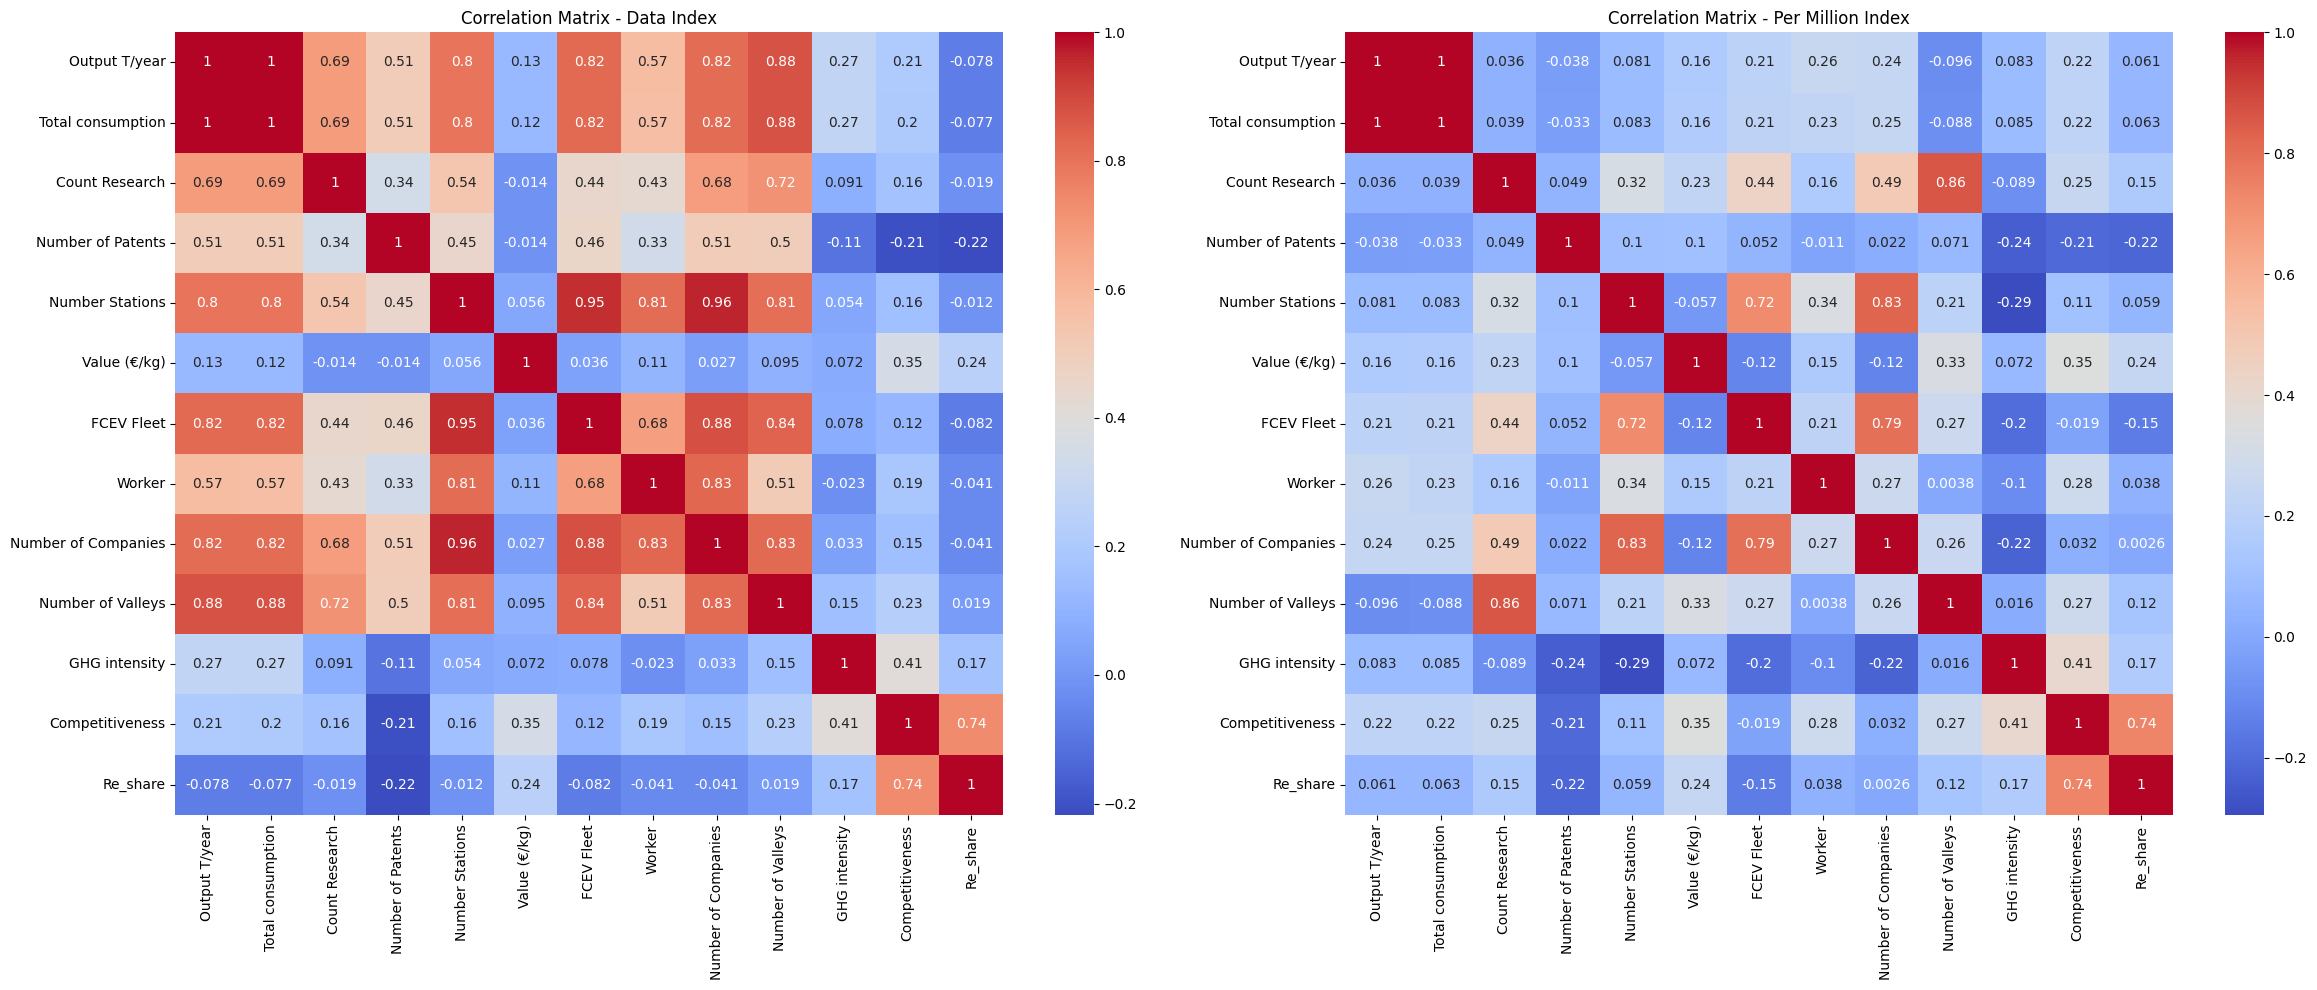

In [3]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = merged_df_index.select_dtypes(include=np.number).columns
correlation_matrix_data_index = merged_df_index[numeric_columns].corr()
correlation_matrix_per_million_index = per_million_df_index[numeric_columns].corr()

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Plot the first heatmap
sns.heatmap(correlation_matrix_data_index, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix - Data Index')

# Plot the second heatmap
sns.heatmap(correlation_matrix_per_million_index, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix - Per Million Index')

# Adjust layout
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('correlation_matrices.png')

# Display the figure
plt.show()

# Scatter plots

Here we create different combinations of dimensions to try and find noteworthy plots for the master thesis.

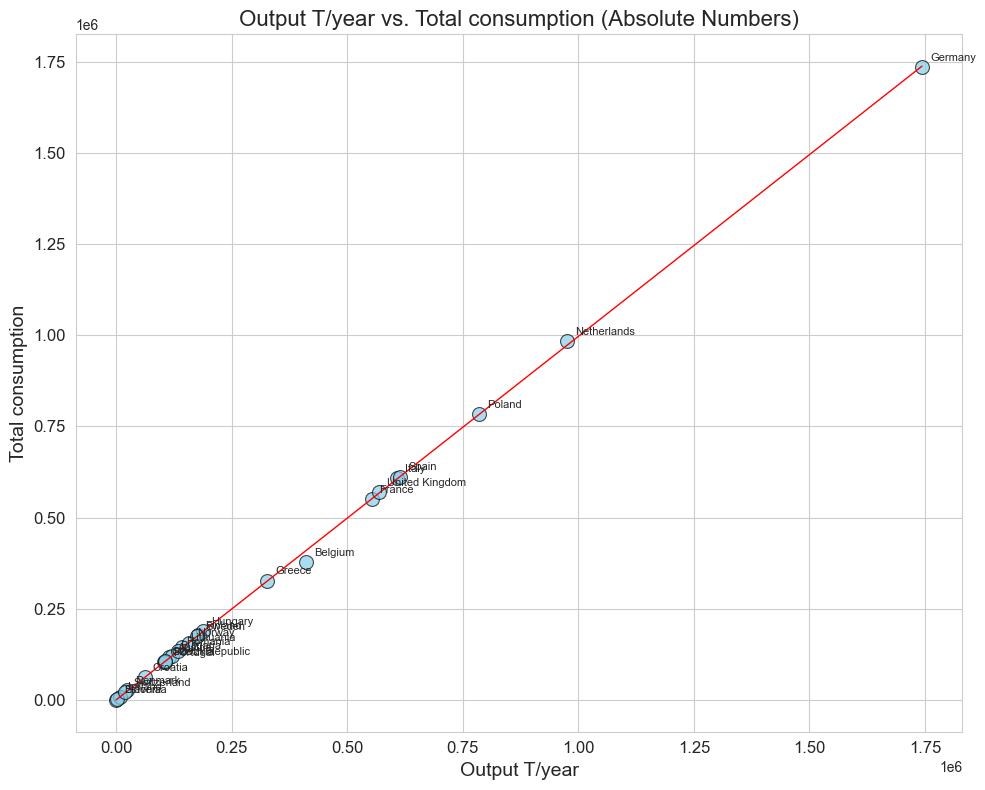

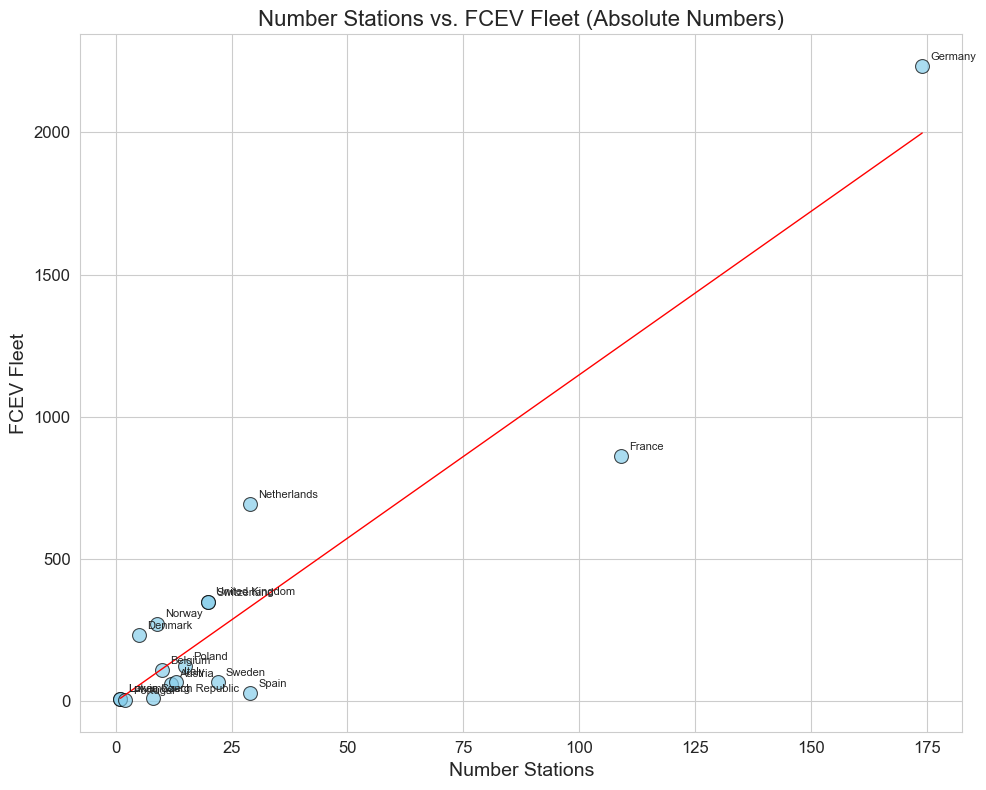

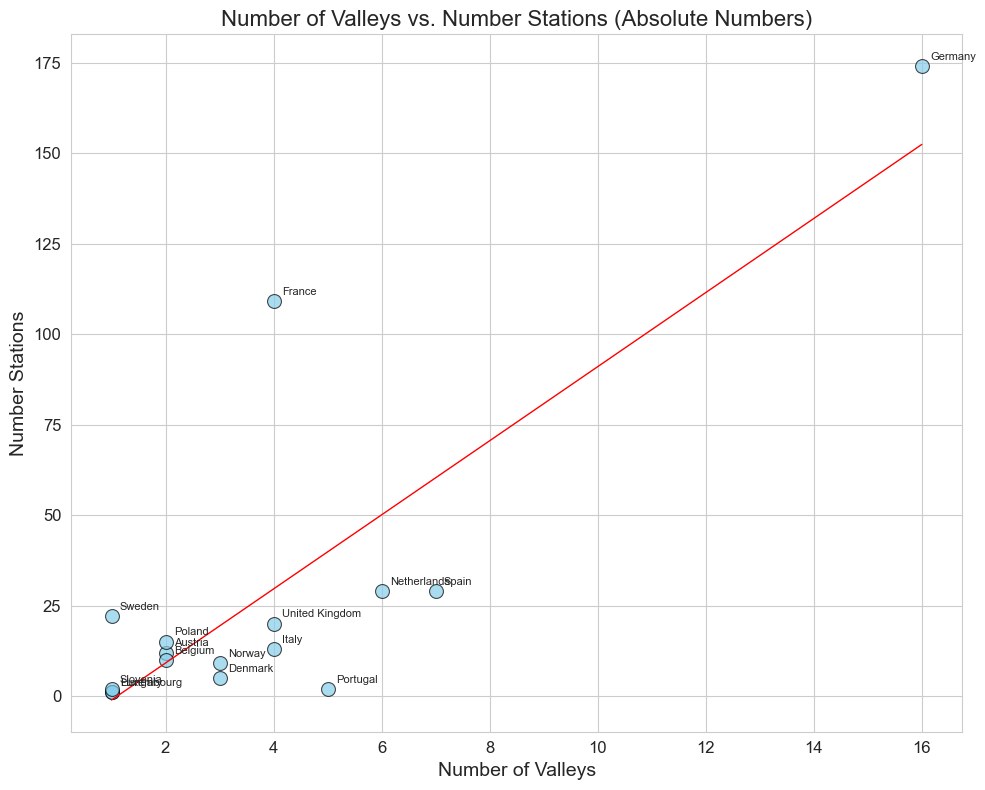

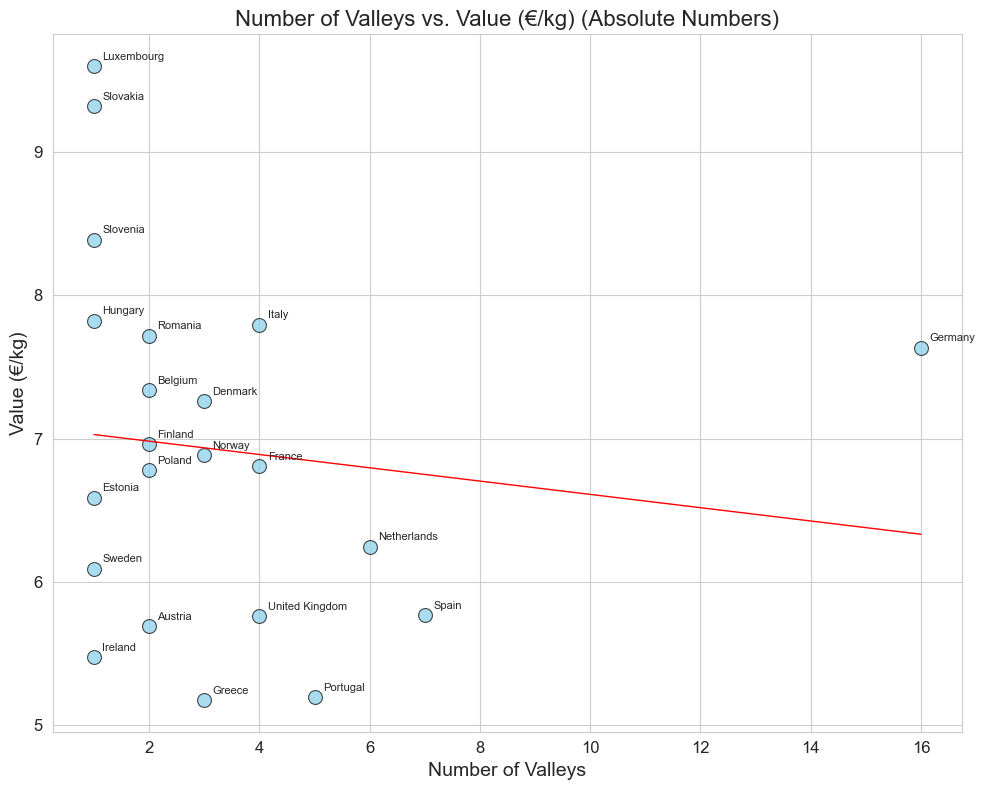

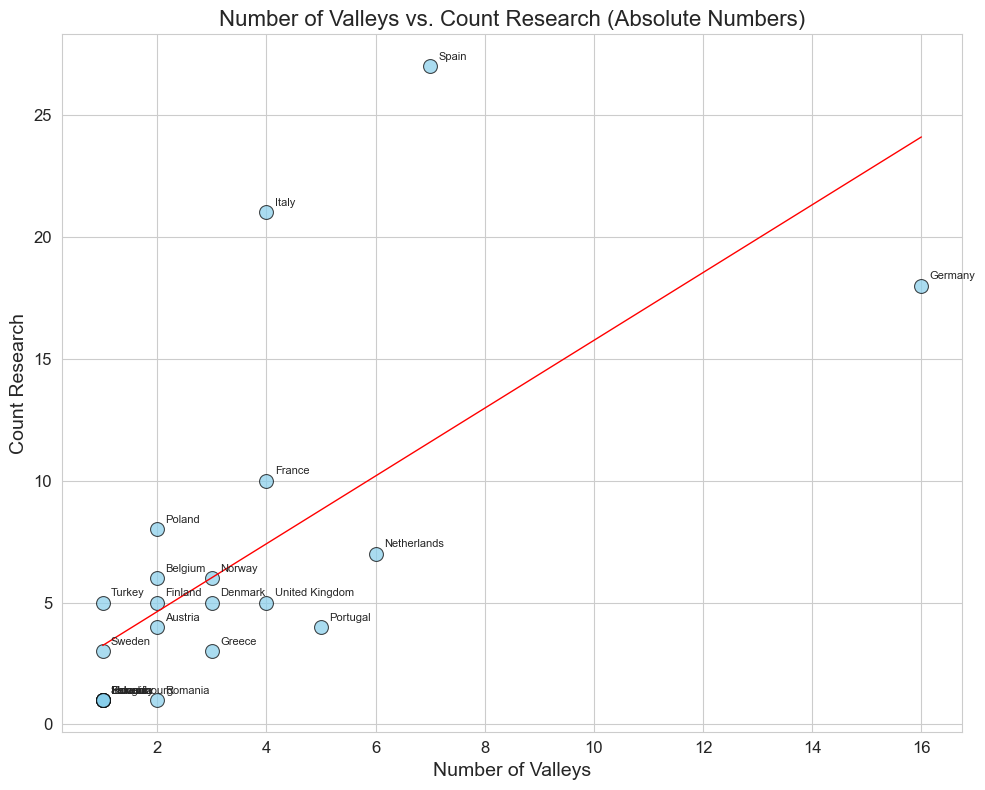

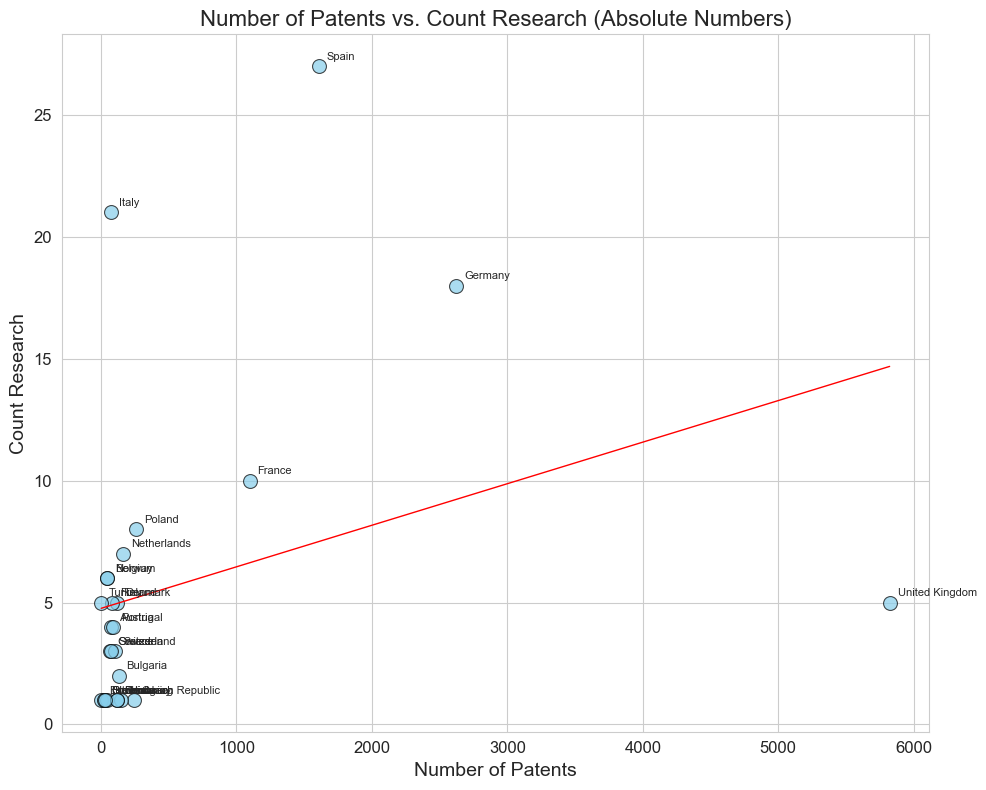

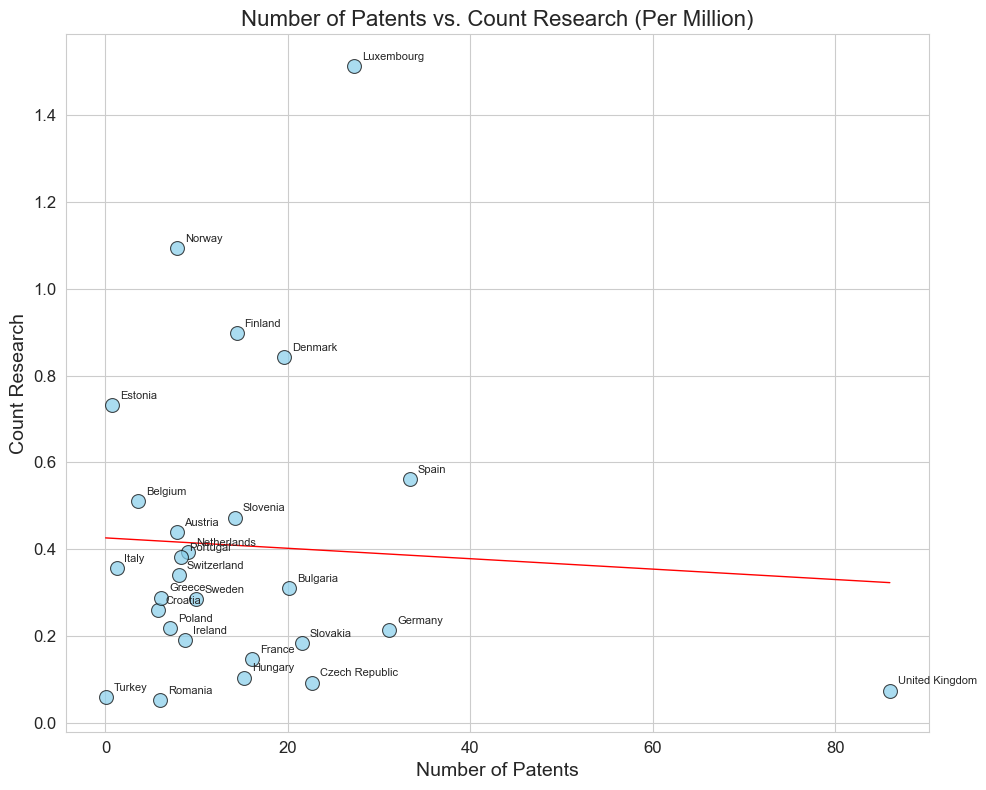

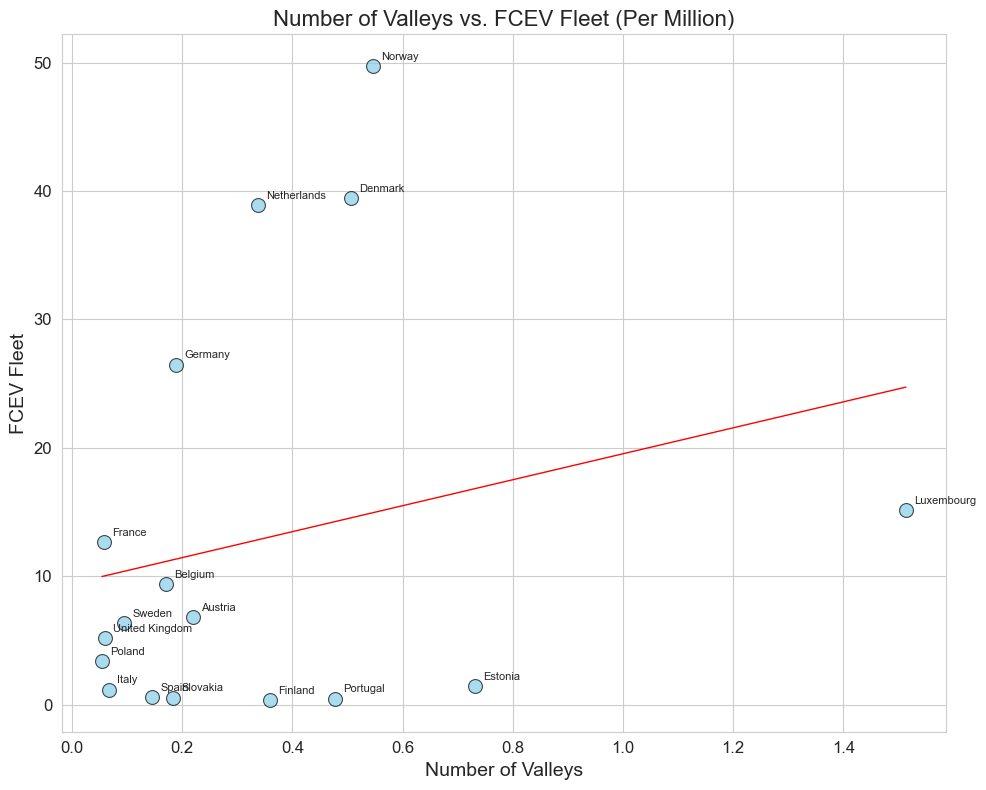

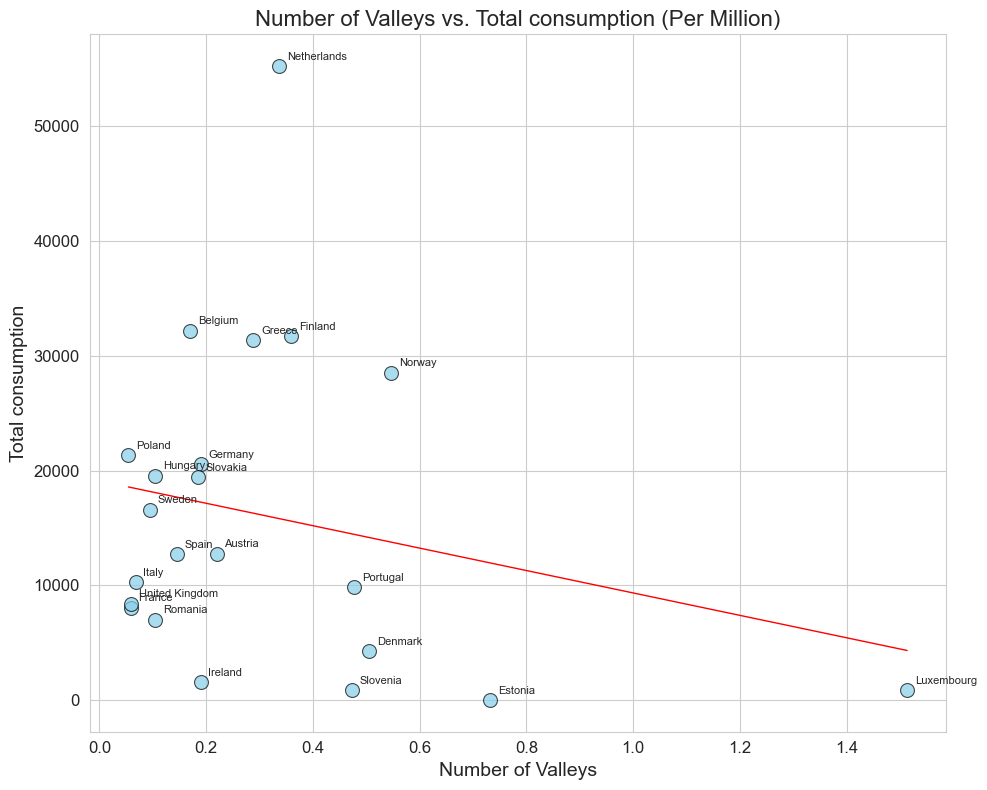

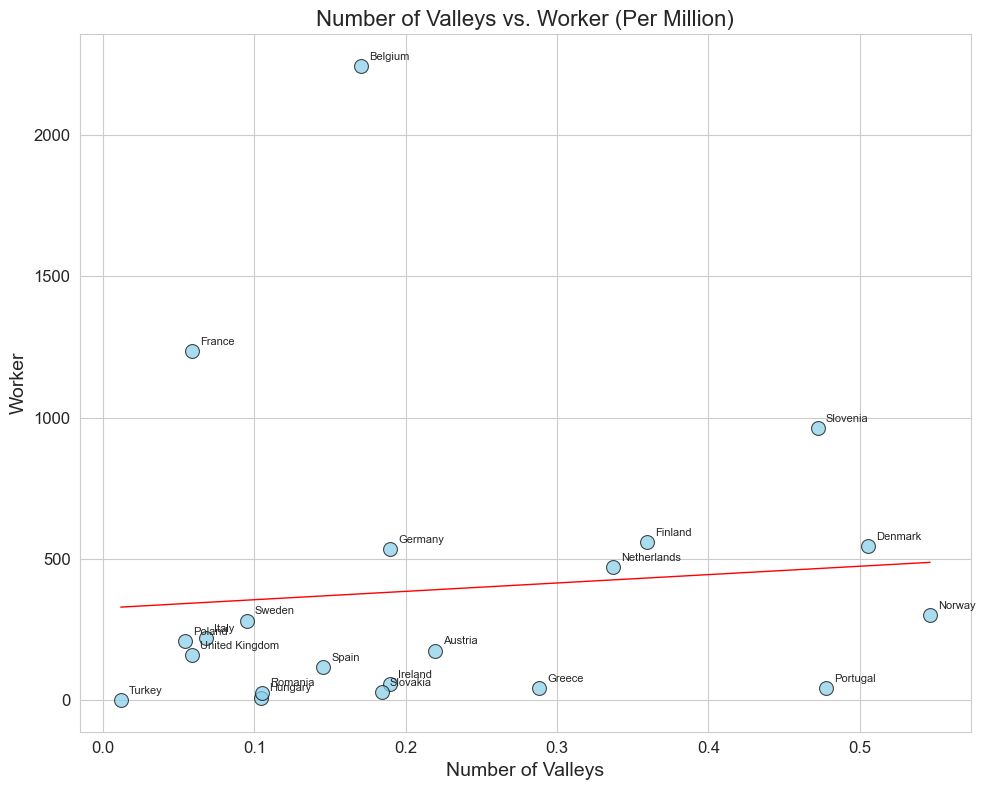

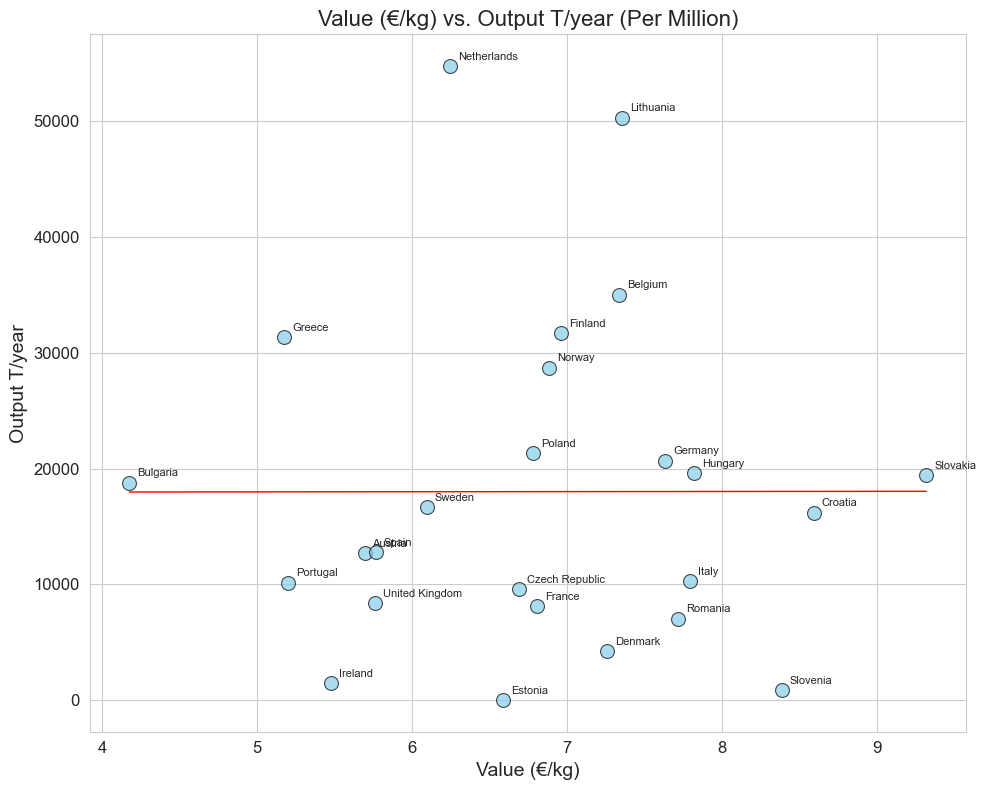

In [4]:
def create_correlation_plots(dataframe, var_pairs, title_suffix=""):
    for x_var, y_var in var_pairs:
        # Filter out rows with zero values in either x_var or y_var
        filtered_df = dataframe[(dataframe[x_var] != 0.0) & (dataframe[y_var] != 0.0)]

        plt.figure(figsize=(10, 8))
        sns.set_style("whitegrid")  # Set the style
        sns.scatterplot(x=x_var, y=y_var, data=filtered_df, s=100, alpha=0.7, color='skyblue', edgecolor='black')  # Adjust marker size and color
        sns.regplot(x=x_var, y=y_var, data=filtered_df, scatter=False, color='red', ci=None, line_kws={"linewidth": 1})  # Adjust regression line

        # Calculate offset based on data range of filtered data
        x_range = filtered_df[x_var].max() - filtered_df[x_var].min()
        y_range = filtered_df[y_var].max() - filtered_df[y_var].min()
        x_offset = x_range * 0.01
        y_offset = y_range * 0.01

        for i in range(len(filtered_df)):
            plt.text(filtered_df[x_var].iloc[i] + x_offset, filtered_df[y_var].iloc[i] + y_offset, filtered_df['Country'].iloc[i], fontsize=8)  # Adjust label font size

        plt.title(f'{x_var} vs. {y_var} {title_suffix}', fontsize=16)  # Adjust title font size
        plt.xlabel(x_var, fontsize=14)  # Adjust x-axis label font size
        plt.ylabel(y_var, fontsize=14)  # Adjust y-axis label font size
        plt.xticks(fontsize=12)  # Adjust tick label font size
        plt.yticks(fontsize=12)  # Adjust tick label font size
        plt.tight_layout()  # Adjust layout
        plt.show()

# Variable pairs for absolute analysis
absolute_pairs = [
    ('Output T/year', 'Total consumption'), #interesting
    ('Number Stations', 'FCEV Fleet'), #obvious buy maybe good to show for the report
    ('Number of Valleys', 'Number Stations'), #interesting
    ('Number of Valleys', 'Value (€/kg)'), #interesting
    ('Number of Valleys', 'Count Research'), #interesting
    ('Number of Patents', 'Count Research'), #interesting
]

# Variable pairs for per million analysis
per_million_pairs = [
    ('Number of Patents', 'Count Research'),
    ('Number of Valleys', 'FCEV Fleet'), #interesting
    ('Number of Valleys', 'Total consumption'), #interesting
    ('Number of Valleys', 'Worker'), #interesting
    ('Value (€/kg)', 'Output T/year'), #interesting
]

# Create plots for absolute numbers
create_correlation_plots(merged_df, absolute_pairs, title_suffix="(Absolute Numbers)")

# Create plots for per million numbers
create_correlation_plots(per_million_df, per_million_pairs, title_suffix="(Per Million)")


Combinations that were found interesting were put together for a closer analysis. Fitting graphs were combined into one picture to save space in the master thesis.

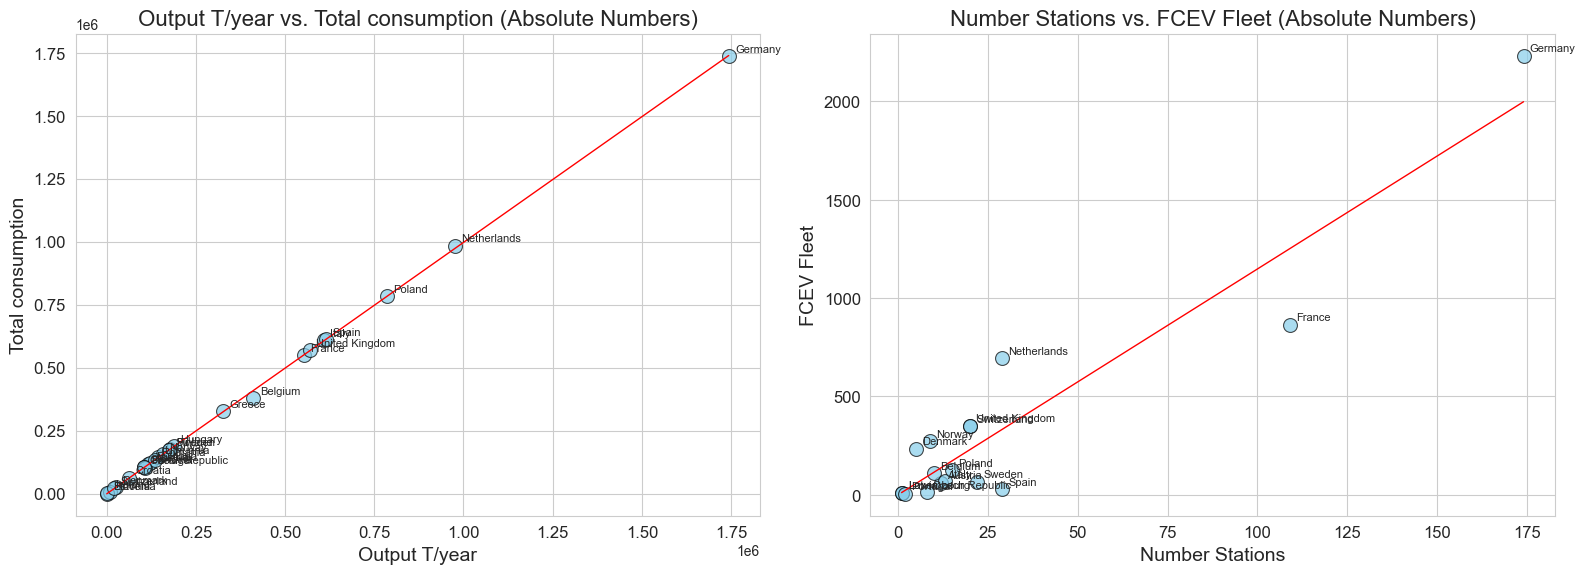

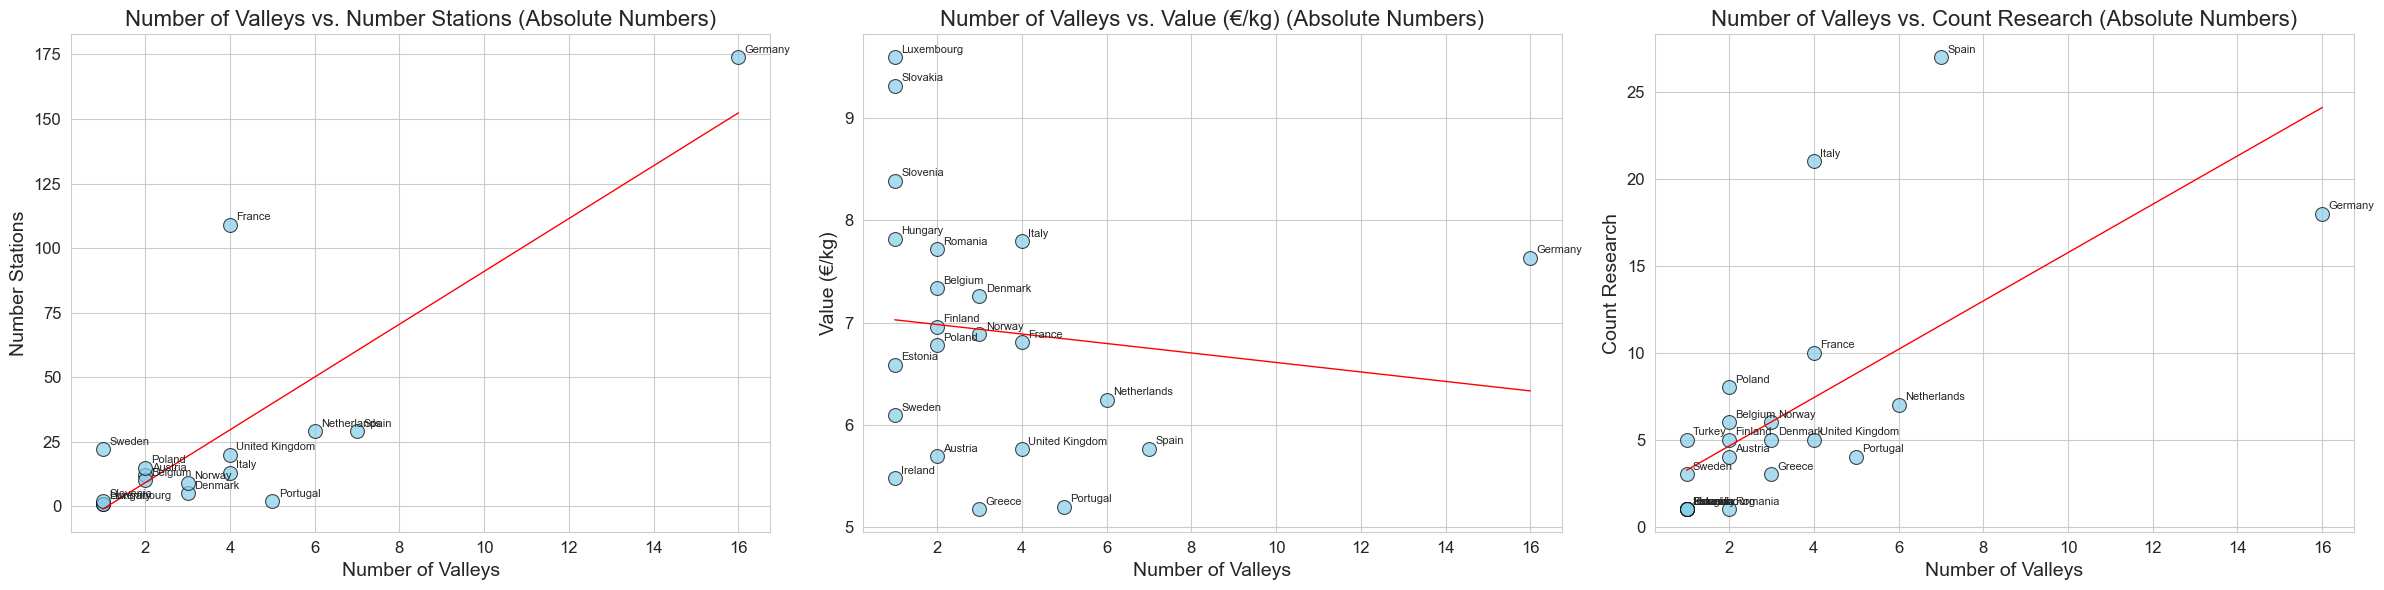

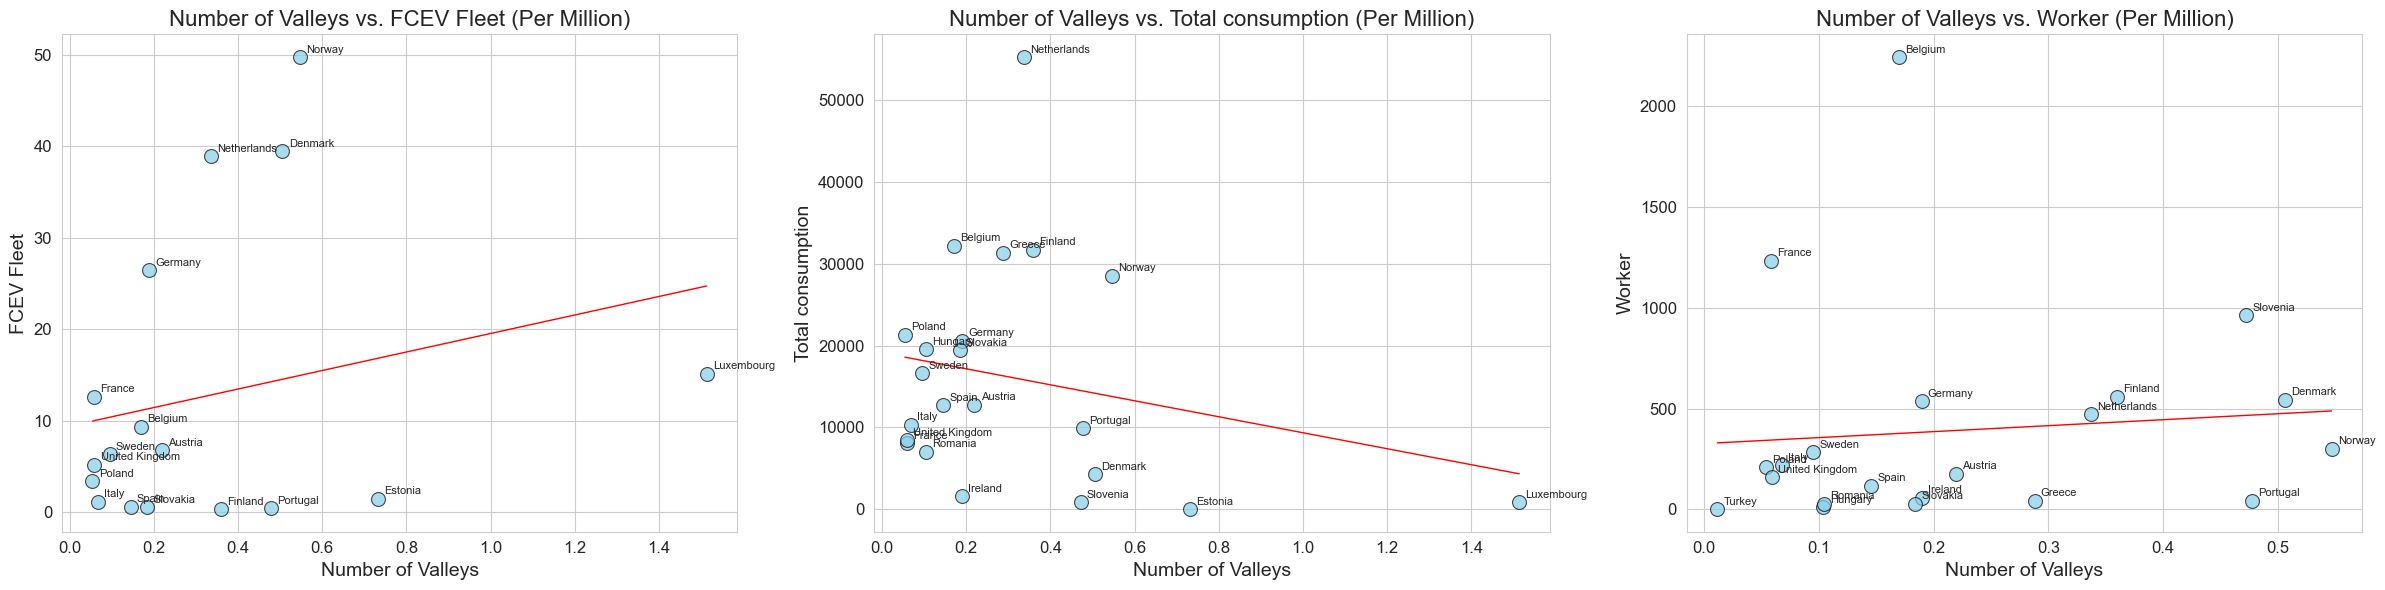

In [5]:
# Define plot combinations
plot_combinations = [
    # Absolute values
    [
        ('Output T/year', 'Total consumption'),
        ('Number Stations', 'FCEV Fleet')
    ],
    [
        ('Number of Valleys', 'Number Stations'),
        ('Number of Valleys', 'Value (€/kg)'),
        ('Number of Valleys', 'Count Research')
    ],
    # Absolute and per million
    [
        ('Number of Patents', 'Count Research'),
        ('Number of Patents', 'Count Research')
    ],
    # Per million values
    [
        ('Number of Valleys', 'FCEV Fleet'),
        ('Number of Valleys', 'Total consumption'),
        ('Number of Valleys', 'Worker')
    ]
]

# Define a function to create and save plots
def create_and_save_plots(dataframe, var_pairs, title_suffix, file_name):
    num_plots = len(var_pairs)
    fig, axes = plt.subplots(1, num_plots, figsize=(8 * num_plots, 6))
    axes = np.atleast_1d(axes)  # Ensure axes is always an array

    for i, (x_var, y_var) in enumerate(var_pairs):
        filtered_df = dataframe[(dataframe[x_var] != 0.0) & (dataframe[y_var] != 0.0)]

        sns.scatterplot(x=x_var, y=y_var, data=filtered_df, s=100, alpha=0.7, color='skyblue', edgecolor='black', ax=axes[i])
        sns.regplot(x=x_var, y=y_var, data=filtered_df, scatter=False, color='red', ci=None, line_kws={"linewidth": 1}, ax=axes[i])

        # Calculate offset based on data range of filtered data
        x_range = filtered_df[x_var].max() - filtered_df[x_var].min()
        y_range = filtered_df[y_var].max() - filtered_df[y_var].min()
        x_offset = x_range * 0.01
        y_offset = y_range * 0.01

        for j in range(len(filtered_df)):
            axes[i].text(filtered_df[x_var].iloc[j] + x_offset, filtered_df[y_var].iloc[j] + y_offset, filtered_df['Country'].iloc[j], fontsize=8)

        axes[i].set_title(f'{x_var} vs. {y_var} {title_suffix}', fontsize=16)
        axes[i].set_xlabel(x_var, fontsize=14)
        axes[i].set_ylabel(y_var, fontsize=14)
        axes[i].tick_params(axis='both', labelsize=12)

    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()

# Create plots for absolute numbers - Group 1
create_and_save_plots(merged_df, plot_combinations[0], '(Absolute Numbers)', 'combined_plots_group1.png')

# Create plots for absolute numbers - Group 2
create_and_save_plots(merged_df, plot_combinations[1], '(Absolute Numbers)', 'combined_plots_group2.png')

# Create plots for per million numbers - Group 4
create_and_save_plots(per_million_df, plot_combinations[3], '(Per Million)', 'combined_plots_group4.png')

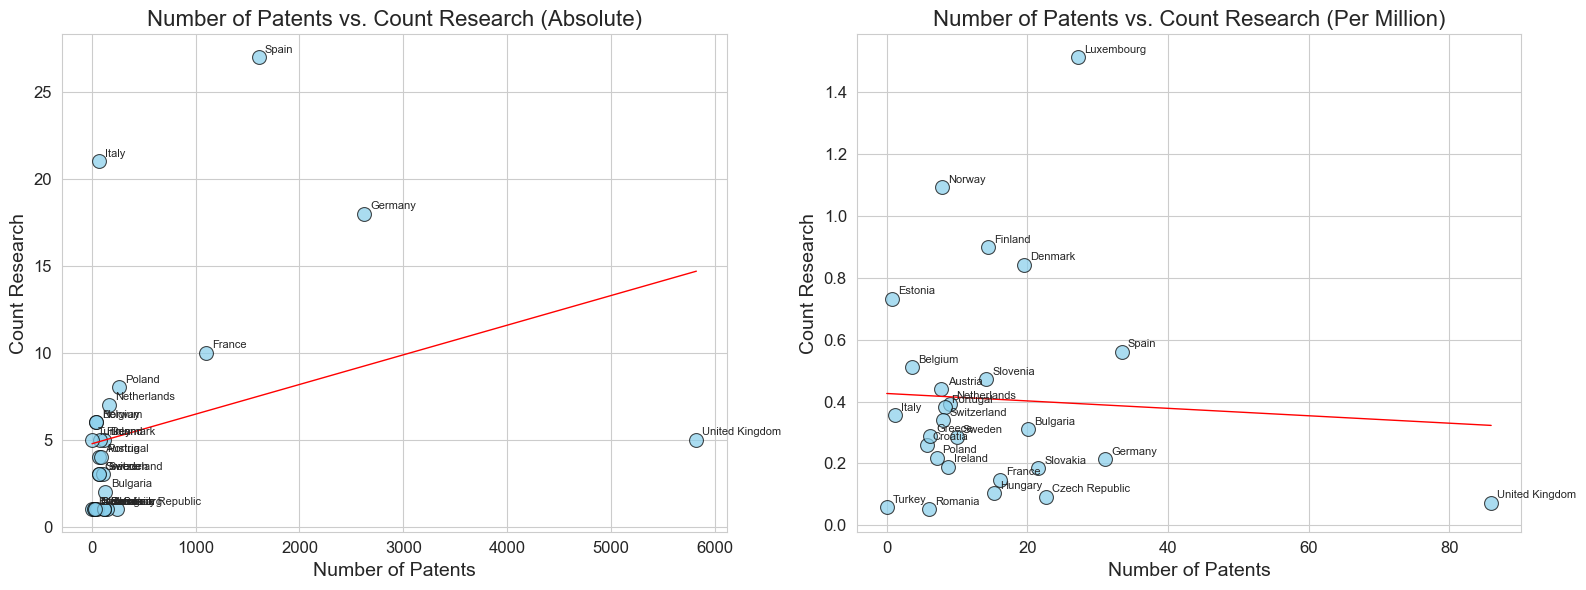

In [6]:
# Define a function to create and save combined plots for absolute and per million values
def create_combined_plots(data_abs, data_per_million, var_pairs_abs, var_pairs_per_million, title_suffix, file_name):
    num_plots = len(var_pairs_abs) + len(var_pairs_per_million)
    fig, axes = plt.subplots(1, num_plots, figsize=(8 * num_plots, 6))
    axes = np.atleast_1d(axes)  # Ensure axes is always an array

    for i, (x_var, y_var) in enumerate(var_pairs_abs):
        filtered_df = data_abs[(data_abs[x_var] != 0.0) & (data_abs[y_var] != 0.0)]

        sns.scatterplot(x=x_var, y=y_var, data=filtered_df, s=100, alpha=0.7, color='skyblue', edgecolor='black', ax=axes[i])
        sns.regplot(x=x_var, y=y_var, data=filtered_df, scatter=False, color='red', ci=None, line_kws={"linewidth": 1}, ax=axes[i])

        # Calculate offset based on data range of filtered data
        x_range = filtered_df[x_var].max() - filtered_df[x_var].min()
        y_range = filtered_df[y_var].max() - filtered_df[y_var].min()
        x_offset = x_range * 0.01
        y_offset = y_range * 0.01

        for j in range(len(filtered_df)):
            axes[i].text(filtered_df[x_var].iloc[j] + x_offset, filtered_df[y_var].iloc[j] + y_offset, filtered_df['Country'].iloc[j], fontsize=8)

        axes[i].set_title(f'{x_var} vs. {y_var} (Absolute)', fontsize=16)
        axes[i].set_xlabel(x_var, fontsize=14)
        axes[i].set_ylabel(y_var, fontsize=14)
        axes[i].tick_params(axis='both', labelsize=12)

    for i, (x_var, y_var) in enumerate(var_pairs_per_million):
        filtered_df = data_per_million[(data_per_million[x_var] != 0.0) & (data_per_million[y_var] != 0.0)]

        sns.scatterplot(x=x_var, y=y_var, data=filtered_df, s=100, alpha=0.7, color='skyblue', edgecolor='black', ax=axes[i + len(var_pairs_abs)])
        sns.regplot(x=x_var, y=y_var, data=filtered_df, scatter=False, color='red', ci=None, line_kws={"linewidth": 1}, ax=axes[i + len(var_pairs_abs)])

        # Calculate offset based on data range of filtered data
        x_range = filtered_df[x_var].max() - filtered_df[x_var].min()
        y_range = filtered_df[y_var].max() - filtered_df[y_var].min()
        x_offset = x_range * 0.01
        y_offset = y_range * 0.01

        for j in range(len(filtered_df)):
            axes[i + len(var_pairs_abs)].text(filtered_df[x_var].iloc[j] + x_offset, filtered_df[y_var].iloc[j] + y_offset, filtered_df['Country'].iloc[j], fontsize=8)

        axes[i + len(var_pairs_abs)].set_title(f'{x_var} vs. {y_var} (Per Million)', fontsize=16)
        axes[i + len(var_pairs_abs)].set_xlabel(x_var, fontsize=14)
        axes[i + len(var_pairs_abs)].set_ylabel(y_var, fontsize=14)
        axes[i + len(var_pairs_abs)].tick_params(axis='both', labelsize=12)

    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()

# Create combined plots for Group 3
create_combined_plots(merged_df, per_million_df, [plot_combinations[2][0]], [plot_combinations[2][1]], '(Absolute and Per Million)', 'combined_plots_group3.png')

Since we also included indexes, thos were also used for analysis and included. More specifically:

- Carbon intensity is a measure of carbon dioxide and other greenhouse gases (CO2e) per unit of activity, like generating a product.

- The IMD World Competitiveness Ranking was created, in a bid to provide actionable data analysis on economies, regions and sub-regions according to how they optimize their individual competencies in order to achieve long-term value creation for their people. It provides benchmarking and exposes trends, using both statistics and real-world survey data.

- Share of energy consumption from renewable sources in Europe

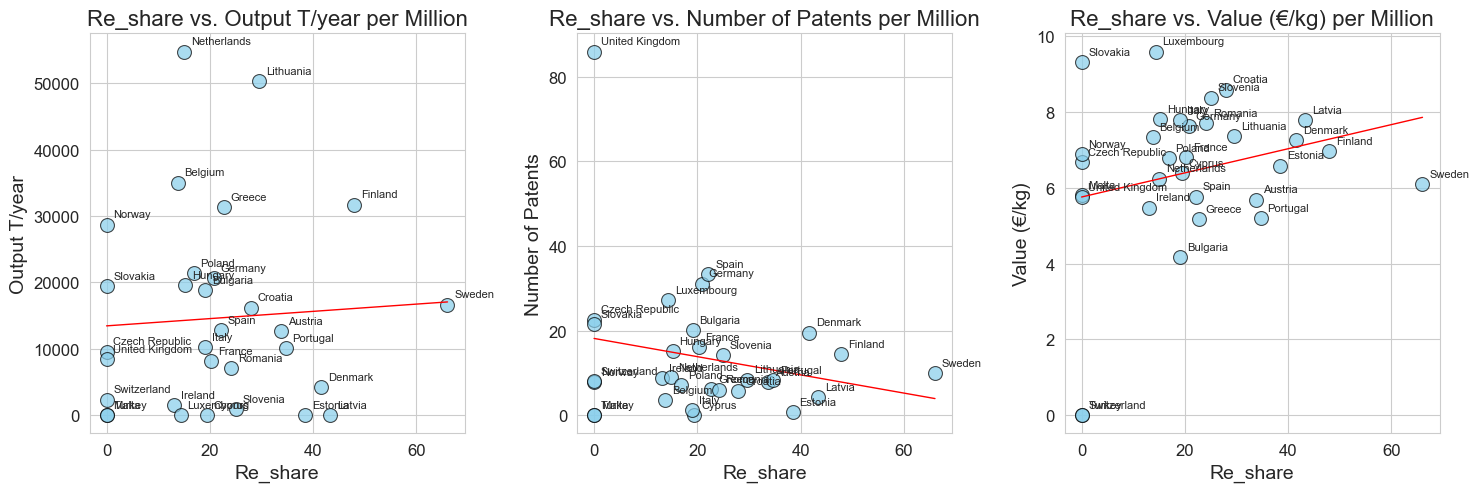

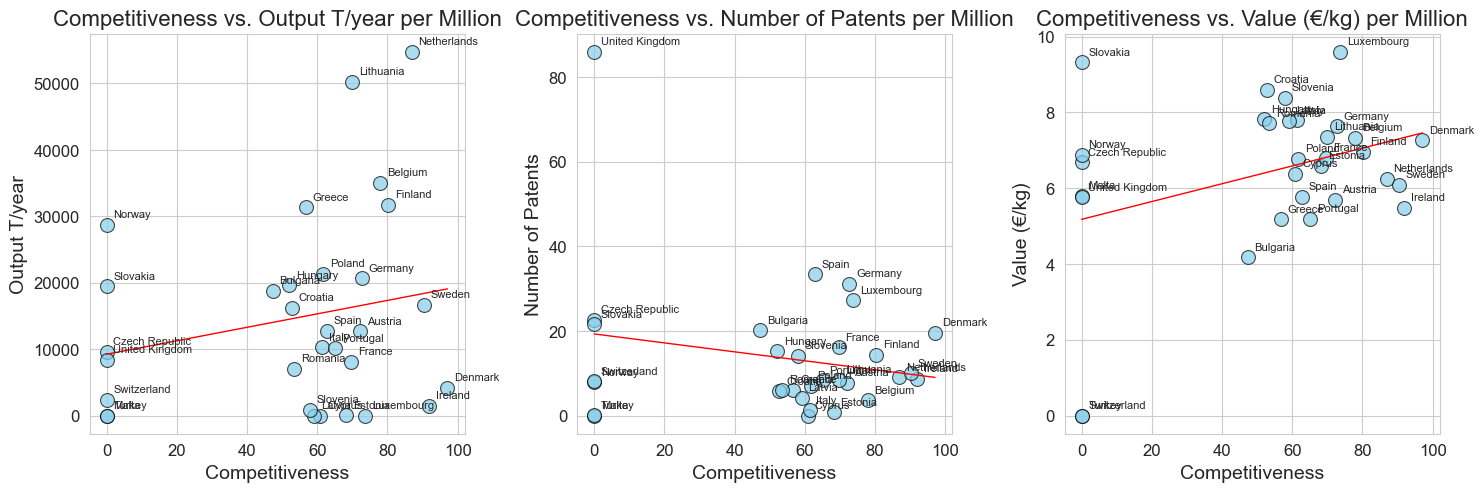

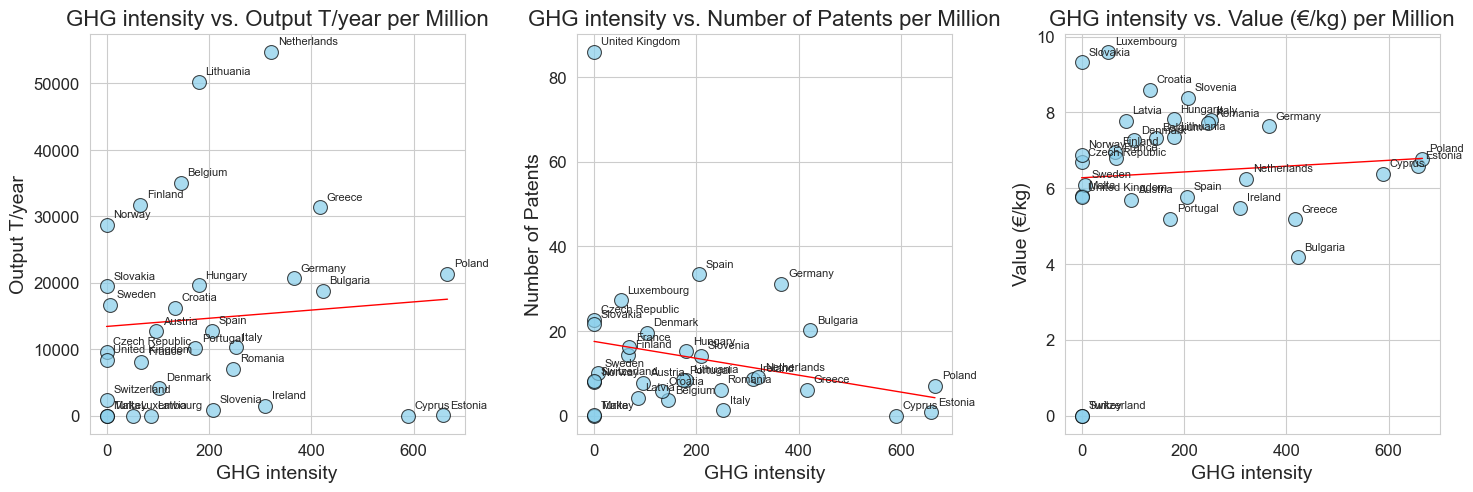

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_index_comparison_plots(dataframe, indices, variables, title_suffix=""):
    for index in indices:
        num_vars = len(variables)
        fig, axes = plt.subplots(1, num_vars, figsize=(5 * num_vars, 5))
        axes = np.atleast_1d(axes)  # Ensure axes is always an array

        for col, var in enumerate(variables):
            ax = axes[col]
            sns.set_style("whitegrid")
            sns.scatterplot(x=index, y=var, data=dataframe, s=100, alpha=0.7, color='skyblue', edgecolor='black', ax=ax)
            sns.regplot(x=index, y=var, data=dataframe, scatter=False, color='red', ci=None, line_kws={"linewidth": 1}, ax=ax)

            x_range = dataframe[index].max() - dataframe[index].min()
            y_range = dataframe[var].max() - dataframe[var].min()
            x_offset = x_range * 0.02
            y_offset = y_range * 0.02

            for i in range(len(dataframe)):
                ax.text(dataframe[index].iloc[i] + x_offset, dataframe[var].iloc[i] + y_offset, dataframe['Country'].iloc[i], fontsize=8)

            ax.set_title(f'{index} vs. {var} {title_suffix}', fontsize=16)
            ax.set_xlabel(index, fontsize=14)
            ax.set_ylabel(var, fontsize=14)
            ax.tick_params(axis='both', labelsize=12)

        plt.tight_layout()
        plt.subplots_adjust(top=0.9, bottom=0.1, left=0.05, right=0.95, hspace=0.3, wspace=0.3)  # Adjust layout to add space between plots
        plt.savefig(f'{index}_comparison_{title_suffix.replace(" ", "_")}.png')
        plt.show()

# Define indices and hydrogen economy variables
indices = ['Re_share', 'Competitiveness', 'GHG intensity']
hydrogen_variables = ['Output T/year', 'Number of Patents', 'Value (€/kg)']

# Create scatter plots with regression lines
create_index_comparison_plots(per_million_df_index, indices, hydrogen_variables, title_suffix="per Million")


### 8. Value Chain Analysis

In this step, the analysis focuses on understanding the distribution and normalization of various aspects of the hydrogen value chain across different countries. Here's a detailed explanation of what happens:

#### Relative Distribution Calculation

1. **Define Value Chain Steps**:
   - A dictionary is created to map different steps in the hydrogen value chain to their corresponding columns in the dataset. These steps include production, costs, demand, research, patents, charging infrastructure, usage (FCEV fleet), and companies.

2. **Calculate Relative Distribution**:
   - For each step in the value chain, the sum of the relevant columns is calculated for each country. This sum is then divided by the total sum across all countries to get the relative distribution.
   - The relative distribution values represent each country's contribution to a particular value chain step relative to the total contribution of all countries.

3. **Create DataFrame for Relative Distribution**:
   - The calculated relative distributions are stored in a DataFrame with countries as rows and value chain steps as columns.
   - An additional column is calculated to store the sum of each row, which represents the total relative contribution of each country across all value chain steps.

4. **Sort and Visualize**:
   - The DataFrame is sorted based on the total relative contribution (row sum) in descending order.
   - A heatmap is plotted to visualize the relative distribution of each country in the hydrogen value chain. The rows (countries) are sorted by their overall relative value, and the color intensity in the heatmap represents the relative contribution.


In [8]:
# Step 3: Value Chain Analysis
value_chain_steps = {
    'Production': ['Output T/year'],
    'Costs': ['Value (€/kg)'],
    'Demand': ['Total consumption'],
    'Research': ['Count Research'],
    'Patents': ['Number of Patents'],
    'Charging Infrastructure': ['Number Stations'],
    'Usage ': ['FCEV Fleet'],
    'Companies': ['Number of Companies']
}

relative_distribution = {}

for step, columns in value_chain_steps.items():
    relative_distribution[step] = merged_df[columns].sum(axis=1) / merged_df[columns].sum(axis=1).sum()
    print(f'{step}: {relative_distribution[step]}')


Production: 0     0.014029
1     0.049962
2     0.014722
3     0.007571
4     0.000000
5     0.012619
6     0.003032
7     0.000002
8     0.021436
9     0.067164
10    0.211825
11    0.039675
12    0.022841
13    0.000955
14    0.073857
15    0.000000
16    0.017457
17    0.000000
18    0.000000
19    0.118485
20    0.019149
21    0.095328
22    0.012913
23    0.016321
24    0.012829
25    0.000224
26    0.074654
27    0.021306
28    0.002497
29    0.000000
30    0.069146
dtype: float64
Costs: 0     0.028600
1     0.036854
2     0.020982
3     0.043151
4     0.032076
5     0.033592
6     0.036466
7     0.033091
8     0.034969
9     0.034196
10    0.038346
11    0.026007
12    0.039287
13    0.027516
14    0.039147
15    0.039080
16    0.036956
17    0.048204
18    0.029140
19    0.031376
20    0.034582
21    0.034050
22    0.026116
23    0.038760
24    0.046802
25    0.042123
26    0.028972
27    0.030609
28    0.000000
29    0.000000
30    0.028951
dtype: float64
Demand: 0     0.01417

In [9]:
relative_distribution = pd.DataFrame(relative_distribution)
relative_distribution.index = merged_df['Country']
relative_distribution

relative_distribution.sum(axis=0)

Production                 1.0
Costs                      1.0
Demand                     1.0
Research                   1.0
Patents                    1.0
Charging Infrastructure    1.0
Usage                      1.0
Companies                  1.0
dtype: float64

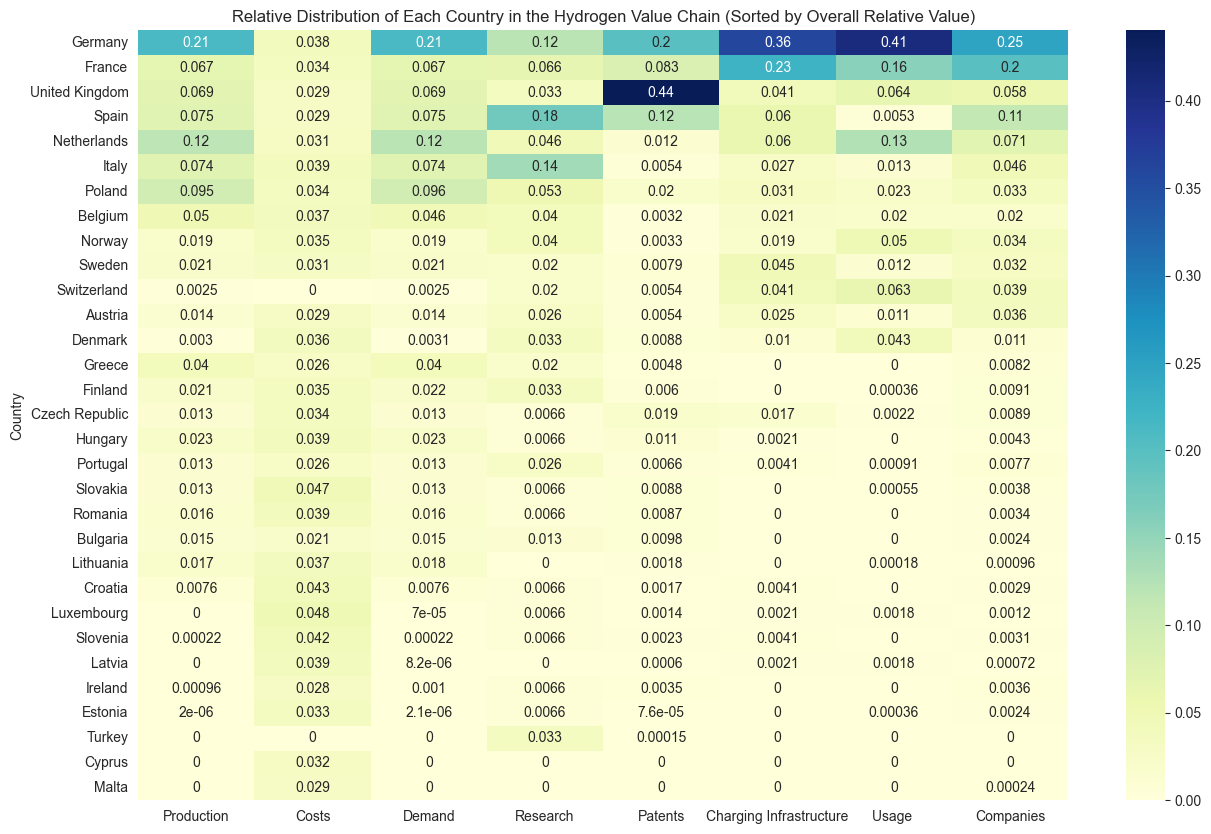

In [10]:
# Calculate the sum of each row
relative_distribution['row_sum'] = relative_distribution.sum(axis=1)

# Sort the DataFrame based on the row sum in descending order
relative_distribution_sorted = relative_distribution.sort_values(by='row_sum', ascending=False).drop(columns='row_sum')

# Plotting heatmap with sorted rows and rotated y-axis tick labels
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(relative_distribution_sorted, cmap='YlGnBu', annot=True, ax=ax)
ax.set_title('Relative Distribution of Each Country in the Hydrogen Value Chain (Sorted by Overall Relative Value)')
plt.yticks(rotation=0)  # Rotate y-axis tick labels to be horizontal
plt.show()

In [11]:
#give plot as png
fig.savefig('relative_distribution.png')

However, as we're dealing with different populations and country sizes a per million perspective would be better suited. And to make it readable, we normalize it from 0 to 1.

#### Normalized Distribution Calculation

1. **Normalize Values**:
   - For each value chain step, the values are normalized to a scale of 0 to 1. Normalization is done by subtracting the minimum value and dividing by the range (maximum value - minimum value).
   - For the cost step, the normalized values are inverted (1 - normalized value) because lower costs are more favorable.

2. **Create DataFrame for Normalized Distribution**:
   - The normalized values are stored in a DataFrame with countries as rows and value chain steps as columns.
   - An additional column is added to store the sum of each row, representing the total normalized contribution of each country across all value chain steps.

3. **Sort and Visualize**:
   - The DataFrame is sorted based on the total normalized contribution (row sum) in descending order.
   - A heatmap is plotted to visualize the normalized distribution of each country in the hydrogen value chain. The rows are sorted by their overall normalized value, and the color intensity in the heatmap represents the normalized contribution.

Production T/year: 0     0.231630
1     0.639587
2     0.343232
3     0.295550
4     0.000000
5     0.175199
6     0.076817
7     0.000225
8     0.579147
9     0.148102
10    0.377469
11    0.572703
12    0.357682
13    0.027247
14    0.188190
15    0.000000
16    0.918441
17    0.000000
18    0.000000
19    1.000000
20    0.524418
21    0.389901
22    0.185447
23    0.128759
24    0.355253
25    0.015930
26    0.233386
27    0.304407
28    0.042575
29    0.000000
30    0.153454
dtype: float64
Costs (€/kg): 0     0.406680
1     0.235461
2     0.564718
3     0.104827
4     0.334569
5     0.303127
6     0.243503
7     0.313524
8     0.274551
9     0.290585
10    0.204498
11    0.460478
12    0.184983
13    0.429173
14    0.187889
15    0.189266
16    0.233331
17    0.000000
18    0.395481
19    0.349088
20    0.282588
21    0.293613
22    0.458208
23    0.195916
24    0.029085
25    0.126154
26    0.398972
27    0.365016
28    1.000000
29    1.000000
30    0.399406
dtype: float64
Demand 

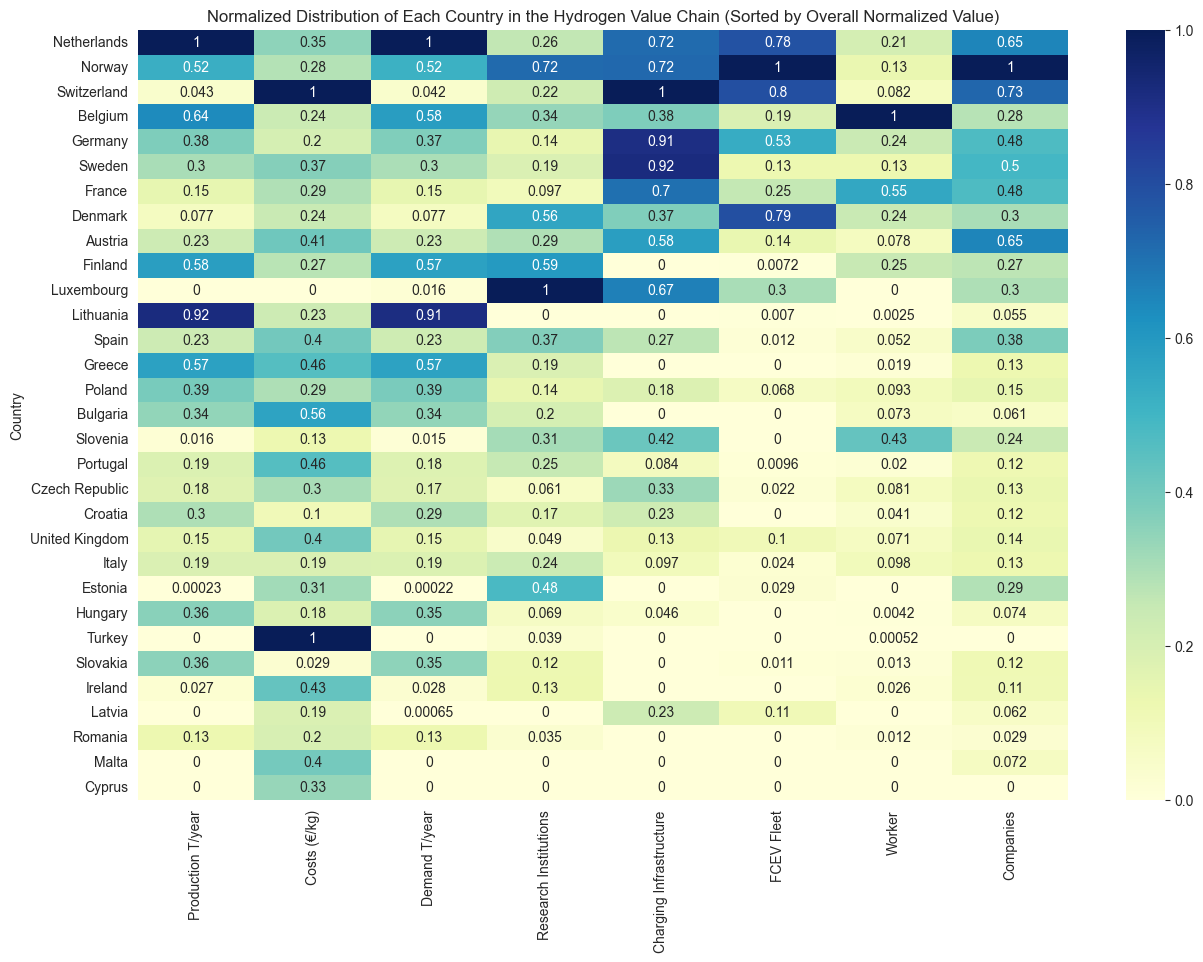

In [12]:
# Step 3: Value Chain Analysis
value_chain_steps = {
    'Production T/year': ['Output T/year'],
    'Costs (€/kg)': ['Value (€/kg)'],
    'Demand T/year': ['Total consumption'],
    'Research Institutions': ['Count Research'],
    'Charging Infrastructure': ['Number Stations'],
    'FCEV Fleet': ['FCEV Fleet'],
    'Worker': ['Worker'],
    'Companies': ['Number of Companies']
}

# Normalize the values for each step
normalized_values = {}

for step, columns in value_chain_steps.items():
    step_data = per_million_df[columns].sum(axis=1)
    normalized_values[step] = (step_data - step_data.min()) / (step_data.max() - step_data.min())
    if step == 'Costs (€/kg)':
        normalized_values[step] = 1 - normalized_values[step]  # Invert the normalized values for costs
    print(f'{step}: {normalized_values[step]}')

# Create a DataFrame from the normalized values
normalized_distribution = pd.DataFrame(normalized_values)
normalized_distribution.index = per_million_df['Country']  # Ensure the index is from the original per_million_df

# Calculate the sum of each row for sorting purposes
normalized_distribution['row_sum'] = normalized_distribution.sum(axis=1)

# Sort the DataFrame based on the row sum in descending order
normalized_distribution_sorted = normalized_distribution.sort_values(by='row_sum', ascending=False).drop(columns='row_sum')

# Plotting heatmap with sorted rows and rotated y-axis tick labels
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(normalized_distribution_sorted, cmap='YlGnBu', annot=True, ax=ax)
ax.set_title('Normalized Distribution of Each Country in the Hydrogen Value Chain (Sorted by Overall Normalized Value)')
plt.yticks(rotation=0)  # Rotate y-axis tick labels to be horizontal
plt.show()

fig.savefig('normalized_per_million.png')